In [24]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pickle

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("./data/train",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("./data/test",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1602 images belonging to 2 classes.
Found 454 images belonging to 2 classes.


In [4]:
test_dataset.class_indices

{'jackfruit': 0, 'mango': 1}

In [5]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
#steps_per_epoch = train_imagesize/batch_size

model.fit_generator(train_dataset,
         steps_per_epoch = 20,
         epochs = 10,
         validation_data = test_dataset
       
         )

Epoch 1/10
20/20 [==============================] - 19s 960ms/step - loss: 0.3789 - accuracy: 0.8426 - val_loss: 0.3660 - val_accuracy: 0.8150
Epoch 2/10
20/20 [==============================] - 19s 955ms/step - loss: 0.3478 - accuracy: 0.8438 - val_loss: 0.3540 - val_accuracy: 0.8392
Epoch 3/10
20/20 [==============================] - 19s 952ms/step - loss: 0.2980 - accuracy: 0.8797 - val_loss: 0.2683 - val_accuracy: 0.9075
Epoch 4/10
20/20 [==============================] - 20s 1s/step - loss: 0.2752 - accuracy: 0.8781 - val_loss: 0.3151 - val_accuracy: 0.8767
Epoch 5/10
20/20 [==============================] - 19s 971ms/step - loss: 0.4886 - accuracy: 0.7754 - val_loss: 0.4603 - val_accuracy: 0.7709
Epoch 6/10
20/20 [==============================] - 20s 1s/step - loss: 0.3623 - accuracy: 0.8531 - val_loss: 0.4779 - val_accuracy: 0.7885
Epoch 7/10
20/20 [==============================] - 20s 1s/step - loss: 0.3678 - accuracy: 0.8141 - val_loss: 0.3602 - val_accuracy: 0.8150
Epoch 8/

In [14]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("MANGO",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("JACKFRUIT",fontsize=30)

[[1.]]


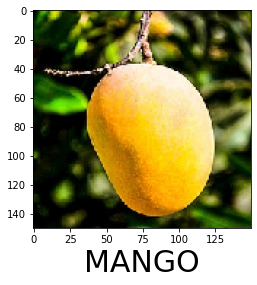

In [20]:
predictImage("./test-data/mng.jpg")

In [32]:
model.save('./models/model.h5')